# Travel Insurance Insurance Claim
- Kemas Veriandra Ramadhan
- Capstone 3
- JCDS - 018


## Business Problem


- Intorduction and Goals

Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama bepergian, baik di dalam negeri maupun ke luar negeri. Perusahaan yang bergerak di bidang asuransi perjalanan ingin mengidentifikasi pemegang polis yang berisiko mengajukan klaim asuransi. Dengan mengetahui pemegang polis yang berisiko, erusahaan asuransi perjalanan ingin mengurangi kerugian finansial yang besar akibat klaim yang tidak terdeteksi dengan memprediksi pemegang polis yang kemungkinan besar akan mengajukan klaim. Maka dari itu pemodelan klasifikasi kali ini berfokus untuk mengejar nilai recall dan pengaturan treshold dari keseimbangan PR-Curve.

- Metric Evaluation

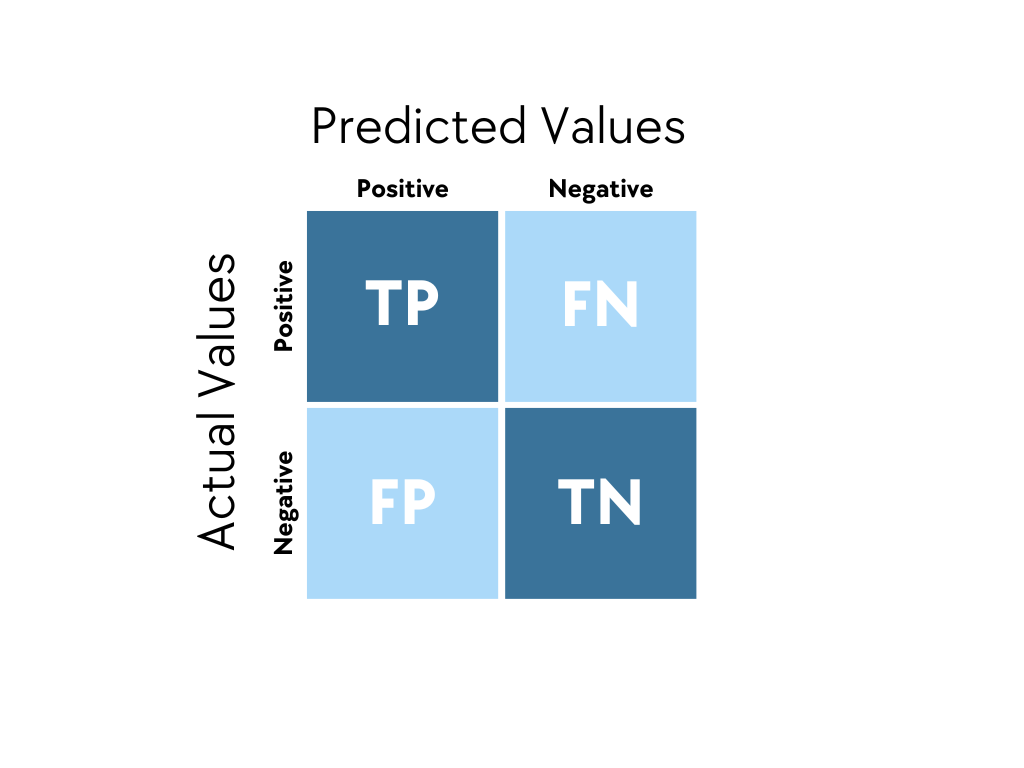

Evaluasi metric model klasifikasi umumnya menggunakan confusion matrix sebagai tahap awal pengindentifikasian metric lebih lanjut. Confusion Matrix berisi beberapa komponen seperti

- True Positives (TP):

Jumlah kasus di mana model dengan benar memprediksi kelas positif (misalnya klaim yang benar-benar terjadi).

Artinya, model memprediksi klaim terjadi, dan memang benar klaim tersebut terjadi.

- False Positives (FP):

Jumlah kasus di mana model salah memprediksi kelas positif (misalnya klaim yang tidak terjadi tetapi diprediksi terjadi).

Artinya, model memprediksi klaim terjadi, tetapi klaim tersebut tidak terjadi (error tipe 1).

- True Negatives (TN):

Jumlah kasus di mana model dengan benar memprediksi kelas negatif (misalnya klaim yang tidak terjadi).

Artinya, model memprediksi klaim tidak terjadi, dan memang benar klaim tersebut tidak terjadi.

- False Negatives (FN):

Jumlah kasus di mana model salah memprediksi kelas negatif (misalnya klaim yang terjadi tetapi diprediksi tidak terjadi).

Artinya, model memprediksi klaim tidak terjadi, padahal klaim tersebut memang terjadi (error tipe 2).

Metrics yang digunakan pada pemodelan klasifikani ini yaitu 

- Reccall

Recall (atau sering disebut Sensitivity, True Positive Rate, atau Hit Rate) adalah metrik evaluasi yang digunakan dalam masalah klasifikasi untuk mengukur seberapa baik model dalam menangkap atau mengidentifikasi kasus yang benar-benar positif. Secara umum, recall mengukur proporsi dari seluruh kasus positif yang sebenarnya (dalam konteks ini, kasus yang memiliki klaim) yang berhasil diprediksi dengan benar oleh model. Ini memberikan gambaran tentang seberapa efektif model dalam "menangkap" kelas positif, atau dengan kata lain, seberapa baik model menghindari False Negatives (FN).

![Screenshot 2025-05-23 203457.png](<attachment:Screenshot 2025-05-23 203457.png>)
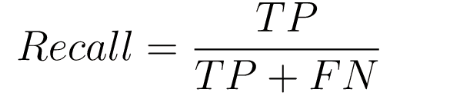
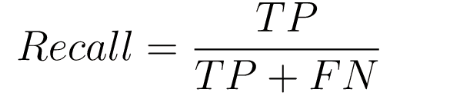
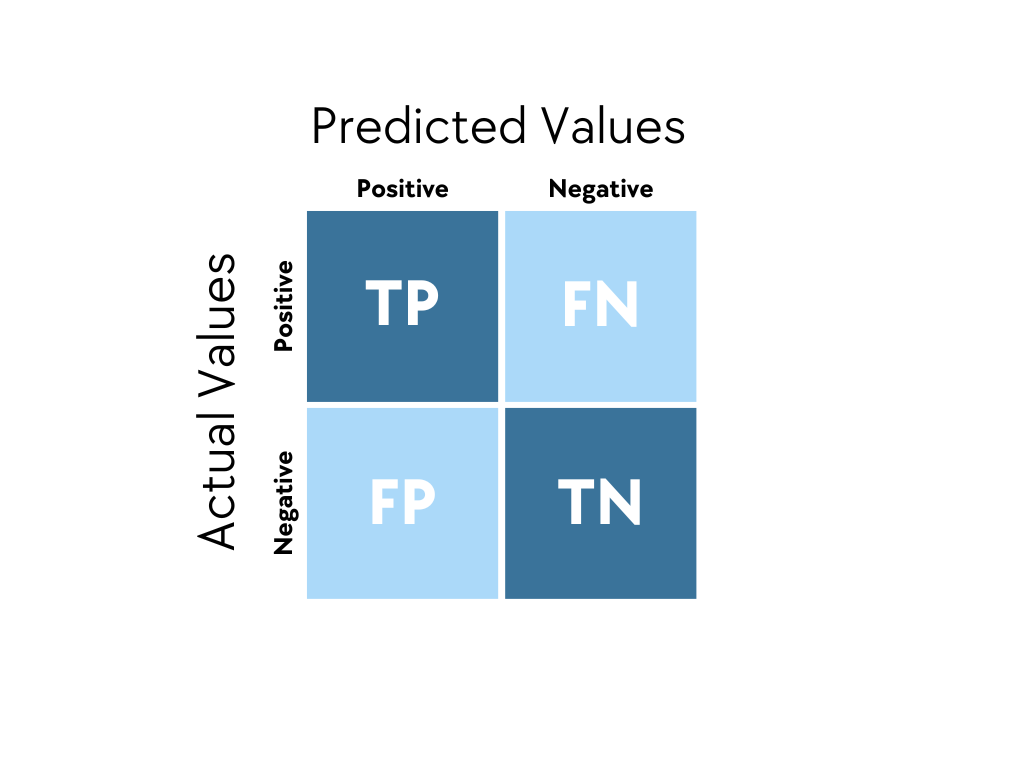

# EDA

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [135]:
df = pd.read_csv('D:/Coding/Python/src/Purwadika/MODUL 3/Capstone Modul 3/data_travel_insurance.csv')


In [136]:
df.head()


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [137]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


terdapat 10 kolom pada data yaitu:
1. agency: nama agensi atau perusahaan yang menjual polis asuransi
2. agency_type: tipe agensi asuransi (maskapai/travel)
3. distribution_channel : saluran distribusi agnsi (online/offline)
4. gender: jenis kelamin pembeli asuransi
5. product_name: nama produk asuransi
6. duration: lama waktu perjalan (hari)
7. destination: tujuan perjalanan (negara)
8. comission: komisi yang diterima agensi asuransi perjalana
9. age: usia pembeli asuransi perjalanan
10. claim: status klaim asuransi atau tida klaim asuransi


Untuk memudahkan analisis lanjut, akan dilakukan pengubahan nama kolom pada dataset

In [138]:
df.rename(columns={'Agency': 'agency',
                   'Agency Type': 'agency_type',
                   'Distribution Channel': 'distribution_channel',
                   'Product Name': 'product_name',
                   'Net Sales': 'net_sales',
                   'Gender':'gender',
                   'Duration':'duration',
                   'Destination':'destination',
                   'Commision (in value)':'comission',
                   'Age':'age',
                   'Claim':'claim'},inplace=True)


In [139]:
df.describe()


,duration,net_sales,comission,age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


Berdasarkan statistik deskriptif ditemukan bahwa
1. terdapat anomali pada duration yaitu durasi perjalan ada yang dibawah 1 hari dimana ini tidak valid serta total jumlah perjalanan maksimum mencapai 4881 hari hal ini akan diinvestigasi lebih lanjut
2. terdapat kenaehan pada kolom age yaitu umur paling kecil adalah 0 tahun dan umur tertinggi adalah 118 tahun dimana jarang sekali manusia yang dapat bertahan hidup lebih dari 100 tahun.
3. terdapat net_sales atau penjualan minus mencapa -357 hal ini perlu diinvestigasi lebih lanjut.

Berdasarkan hasil temuan tersebut, kita dapat melakukan investigasi lebih lanjut dengan melihat domain dari penggunaan polis asuransi perjalanan. Sehingga tidak menggunakan asusmsi pribadi untuk menangani data anomali/outlier.

In [140]:
claim_yes = df[df['claim'] == 'Yes'].count()[1]
print(f'jumlah pemegang polis yang melakukan claim: {claim_yes}')

claim_no= df[df['claim'] == 'No'].count()[1]
print(f'jumlah pemegang polis yang tidak melakukan claim: {claim_no}')

claim_yes = df[df['claim'] == 'Yes'].count()[1]/len(df)
print(f'proporsi pemegang polis yang melakukan claim: {claim_yes}')

claim_no= df[df['claim'] == 'No'].count()[1]/len(df)
print(f'proporsi pemegang polis yang tidak melakukan claim: {claim_no}')


jumlah pemegang polis yang melakukan claim: 677
jumlah pemegang polis yang tidak melakukan claim: 43651
proporsi pemegang polis yang melakukan claim: 0.01527251398664501
proporsi pemegang polis yang tidak melakukan claim: 0.984727486013355


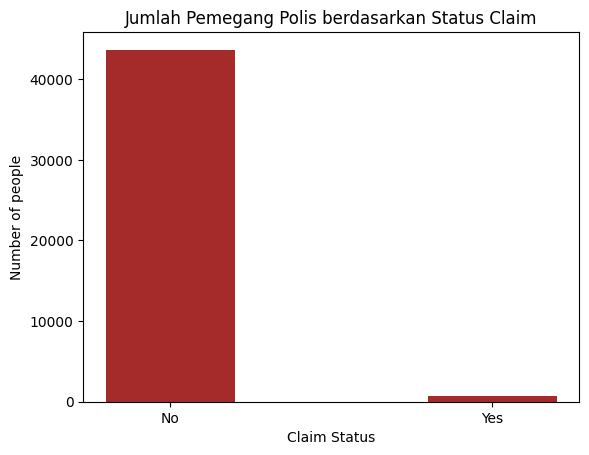

In [141]:
data_claim = df.groupby(by=['claim']).size().reset_index(name='counts')

plt.bar(data_claim['claim'], data_claim['counts'], color ='brown', width = 0.4)
plt.xlabel('Claim Status')
plt.ylabel('Number of people')
plt.title('Jumlah Pemegang Polis berdasarkan Status Claim')
plt.show()
 

Berdasarkan barplot di atas, terlihat bahwa data yang dimiliki termasuk imblanced karena hampir 98% mayoritas data status claimnya tidak sedangkan sisanya 1% melakukan klaim.

## Missing Value

In [142]:
df.isna().sum()


agency                      0
agency_type                 0
distribution_channel        0
product_name                0
gender                  31647
duration                    0
destination                 0
net_sales                   0
comission                   0
age                         0
claim                       0
dtype: int64

ditemukan missing value pada kolom gender sebanyak 31647 pengguna yang tidak diketahui gendernya. Maka kolom ini akan dihapus, juga dikarenakan menurut [IBM](https://www.ibm.com/think/topics/ai-ethics) dinyatakan bahwa gender tidak boleh terlibat dalam pengambilan keputusan dalam data sains.

In [143]:
df.drop(['gender'],axis= 1, inplace= True)


In [144]:
df.isna().sum()


agency                  0
agency_type             0
distribution_channel    0
product_name            0
duration                0
destination             0
net_sales               0
comission               0
age                     0
claim                   0
dtype: int64

## Duplicates

In [145]:
df.duplicated().sum()


np.int64(5004)

Pada dataset asuransi, ditemukan 5004 data duplikat. Aksi yang akan dilakukan adalah menghapus data duplikat tersebut karena pada saat pelatihan model, model akan cenderung belajar dengan data yang sama.

In [146]:
df.drop_duplicates(keep='first', inplace=True)


In [147]:
df.duplicated().sum()


np.int64(0)

## Invalid Data

In [148]:
df.head()


,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,comission,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


Melakukan pengecekan daat invalid pada kolom **duration**, dimana sebelumnya terdapat -1 hari untuk perjalanan dan maks perjalanan sebesar 4887 hari/ >4000 hari

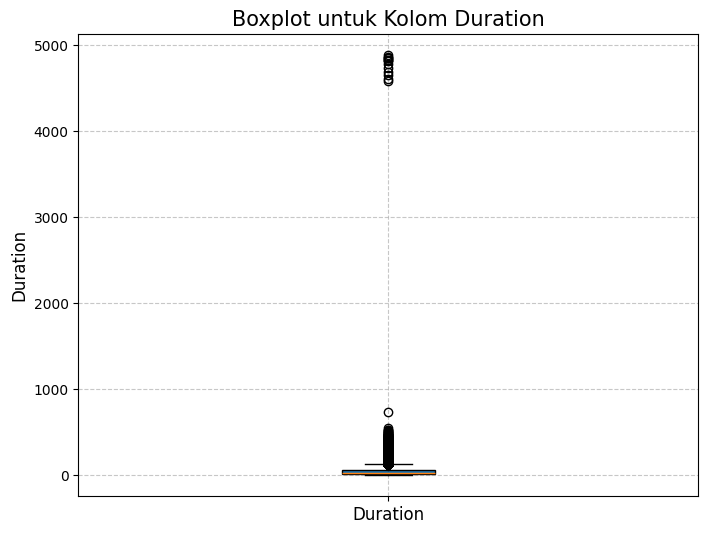

In [149]:
plt.figure(figsize=(8, 6)) # Mengatur ukuran gambar (opsional)
plt.boxplot(df['duration'], patch_artist=True) # vert=True untuk boxplot vertikal, patch_artist untuk bisa mewarnai

# Menambahkan judul dan label
plt.title('Boxplot untuk Kolom Duration', fontsize=15)
plt.ylabel('Duration', fontsize=12)
plt.xticks([1], ['Duration'], fontsize=12) # Memberi label pada sumbu x jika hanya satu boxplot

plt.grid(True, linestyle='--', alpha=0.7) # Menambahkan grid (opsional)
plt.show()


Berdasarkan temuan tersebut terlihat bahwa anomali data pada duration -1 dan diatas 4000, memiliki status claim no sehingga kita dapat hapus data tersebut. Selain itu berdasarkan artikel [comparethemarket](https://www.comparethemarket.com/travel-insurance/content/90-day-travel-insurance/), dikatakan bahwa batas asuransi perjalanan adalah 30 hari. Namun ada juga yang membuat aturan lebih dari 18 bulan/540 hari. Sehingga langkah yang tepat adalah menghapus data dengan ketentuan tersebut. Meskipun terdapat data duration 0 hari hal ini tidak perlu dilakukan penghapusan data, karena dapat dianggapa bahwa perjalanan dilakukan dibawah 24 jam.

In [150]:
data_dur_invalid = df[(df['duration'] < 0) | (df['duration'] > 540)].index
df = df.drop(data_dur_invalid)
df.head()


,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,comission,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


In [151]:
df['duration'].describe()


count    39307.000000
mean        50.689852
std         74.130470
min          0.000000
25%         11.000000
50%         25.000000
75%         57.000000
max        531.000000
Name: duration, dtype: float64

Melakukan pengecekkan pada kolom age, dimana untuk investigasi usia yang dapat menggunakan asuransi perjalanan

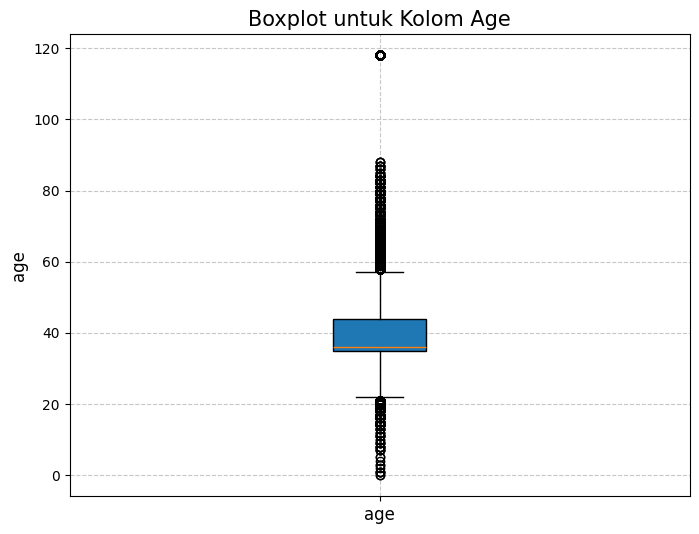

In [152]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['age'], patch_artist=True) 

# Menambahkan judul dan label
plt.title('Boxplot untuk Kolom Age', fontsize=15)
plt.ylabel('age', fontsize=12)
plt.xticks([1], ['age'], fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()


In [153]:
df[(df['age'] == 0) | (df['age'] > 100)]


,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,comission,age,claim
99,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,No
105,JZI,Airlines,Offline,Basic Plan,16,INDONESIA,37.0,12.95,118,No
363,JWT,Airlines,Online,Value Plan,12,INDIA,39.0,15.60,118,No
373,JWT,Airlines,Online,Value Plan,6,INDIA,39.0,15.60,118,No
727,JWT,Airlines,Online,Value Plan,76,INDIA,100.0,40.00,118,No
...,...,...,...,...,...,...,...,...,...,...
43856,JWT,Airlines,Online,Value Plan,10,INDIA,50.0,20.00,118,Yes
43928,JWT,Airlines,Online,Value Plan,83,INDIA,180.0,72.00,118,No
44089,JWT,Airlines,Online,Value Plan,42,INDIA,31.0,12.40,118,No
44140,JWT,Airlines,Online,Value Plan,84,INDIA,93.0,37.20,118,No


Berdasarkan temuan boxplot terlihat sebaran usia memiliki banyak outlier baik di batas bawah dan batas atasnya. Namun fokus disini, adalah menghapus data anomali dengan usia 0 dan usia 100 tahun. Selain itu berdasarkan beberapa aturan perusahan asuransi, batas usia yang dapat membeli asuransi perjalanan membuat batas usia pembelian dari umur 1 tahun hingga 80 tahun. Hal ini disampaikan menurut:
-   [citilink](https://www.citilink.co.id/insurance) 
-   [ACA](https://aca.co.id/Product/New-Travel-Safe)

Sehingga kita bisa melakukan penghapusan outlier yang sesuai dengan kriteria aturan usia pembelian asuransi perjalanan


In [154]:
df_age_invalid = df[(df['age'] == 0) | (df['age'] >75)].index
df = df.drop(df_age_invalid)
df.head()


,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,comission,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


In [155]:
claim_yes = df[df['claim'] == 'Yes'].count()[1]
print(f'jumlah pemegang polis yang melakukan claim: {claim_yes}')

claim_no= df[df['claim'] == 'No'].count()[1]
print(f'jumlah pemegang polis yang tidak melakukan claim: {claim_no}')


jumlah pemegang polis yang melakukan claim: 663
jumlah pemegang polis yang tidak melakukan claim: 38054


Melakukan pengecekkan anomali net_sales minus. Pengecekkan akan dilakukan dengan melihat terlebih dahulu Agency apa yang mendapatkan net sales minus


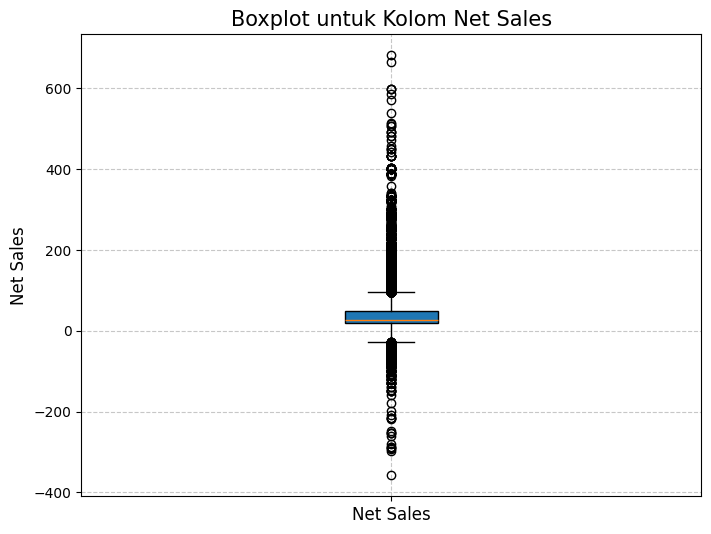

In [156]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['net_sales'], patch_artist=True) 

# Menambahkan judul dan label
plt.title('Boxplot untuk Kolom Net Sales', fontsize=15)
plt.ylabel('Net Sales', fontsize=12)
plt.xticks([1], ['Net Sales'], fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()


In [157]:
#df[(df['net_sales'] <= 0) | (df['net_sales'] >75)]
cek_net = df[(df['net_sales'] < 0)].sort_values(by='net_sales',ascending=True)
cek_net['agency'].value_counts()


agency
CWT    268
EPX    133
C2B     29
JZI     17
ADM     11
LWC      4
ART      3
KML      1
TST      1
RAB      1
Name: count, dtype: int64

ditemukan bahwa sebanyak 468 data yang net_salesnya dibawah 0 dan juga 468 data ini status claimnya adalah 0 sehingga dapat dipertimbangkan untuk dihapus. Namun kita perlu deep dive untuk mencari fakta lain terkait bisa atau tidak data tersebut dihapus.

Melakukan pengecekkan data ketika net sales dibawah 0 namun comission sama dengan 0 

In [158]:
cek_net_com = df[(df['net_sales'] <  0) & (df['comission'] == 0)].sort_values(by='net_sales',ascending=True)
cek_net_com['agency'].value_counts()


agency
EPX    133
Name: count, dtype: int64

Melakukan pengecekkan data ketika net sales dibawah 0 namun comission diatas 0 

In [159]:
cek_net_com = df[(df['net_sales'] <  0) & (df['comission'] > 0)].sort_values(by='net_sales',ascending=True)
cek_net_com['agency'].value_counts().sum()


np.int64(335)

Melakukan pengecekkan data ketika net sales di atas 0 namun comission sama dengan 0 

In [160]:
cek_net_com = df[(df['net_sales'] >  0) & (df['comission'] == 0)].sort_values(by='net_sales',ascending=True)
cek_net_com['agency'].value_counts()


agency
EPX    20460
TTW       66
Name: count, dtype: int64

In [161]:
cek_net_com = df[(df['net_sales'] >  0) & (df['comission'] > 0)].sort_values(by='net_sales',ascending=True)
cek_net_com['agency'].value_counts()


agency
C2B    5163
CWT    4778
JZI    4073
SSI     691
RAB     429
LWC     422
TST     297
KML     227
ART     185
CCR      82
CSR      55
CBH      52
ADM      35
Name: count, dtype: int64

Melakukan pengecekkan data ketika net sales sama dengan 0 namun comission sama dengan 0 

In [162]:
cek_net_com = df[(df['net_sales'] ==  0) & (df['comission'] == 0)].sort_values(by='net_sales',ascending=True)
cek_net_com['agency'].value_counts()


agency
EPX    342
Name: count, dtype: int64

Melakukan pengecekkan data ketika net sales sama dengan 0 namun comission lebih dari 0 

In [163]:
cek_net_com = df[(df['net_sales'] ==  0) & (df['comission'] > 0)].sort_values(by='net_sales',ascending=True)
cek_net_com['agency'].value_counts()


agency
CWT    678
C2B     93
JZI     77
LWC     15
ADM      8
TST      6
CBH      4
ART      4
RAB      4
CCR      2
KML      1
Name: count, dtype: int64

Kesimpulan yang didapatkan setelah melihat net_value dan commission berdasarkan agensi ditemukan:
1. Bahwa agensi EPX tidak mendapatkan komisi baik ketika net_value positif dan net_value negatif
2. Ditemukan 468 data yang net_values dibawah 0 
3. Ditemukan juga 335 data yang mendapatkan comission lebih dari 0 walaupun net_values dibawah 0

sehingga ini mengartikan bahwa, baik minus maupun profit net valuenya comission bisa tetap didapatkan. Asumsi yang mungkin didapatkan adalah adanya kesepakatan antara pihak agensi dan pembeli. Sehingga data tidak dihapus

# Feature Enginering

In [164]:
dfUse = df.copy()


Pengecekkan data Kategory

In [165]:
dfUse.info()


<class 'pandas.core.frame.DataFrame'>
Index: 38717 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                38717 non-null  object 
 1   agency_type           38717 non-null  object 
 2   distribution_channel  38717 non-null  object 
 3   product_name          38717 non-null  object 
 4   duration              38717 non-null  int64  
 5   destination           38717 non-null  object 
 6   net_sales             38717 non-null  float64
 7   comission             38717 non-null  float64
 8   age                   38717 non-null  int64  
 9   claim                 38717 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.2+ MB


In [166]:
#Periksa kolom yang memiliki tipe data object
categorical_columns = dfUse.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(dfUse[col].unique())



Column: agency
['C2B' 'EPX' 'JZI' 'CWT' 'LWC' 'ART' 'CSR' 'RAB' 'KML' 'SSI' 'TTW' 'TST'
 'ADM' 'CCR' 'CBH']

Column: agency_type
['Airlines' 'Travel Agency']

Column: distribution_channel
['Online' 'Offline']

Column: product_name
['Annual Silver Plan' 'Cancellation Plan' 'Basic Plan'
 '2 way Comprehensive Plan' 'Bronze Plan' '1 way Comprehensive Plan'
 'Rental Vehicle Excess Insurance' 'Single Trip Travel Protect Gold'
 'Silver Plan' 'Value Plan' '24 Protect' 'Annual Travel Protect Gold'
 'Comprehensive Plan' 'Ticket Protector'
 'Single Trip Travel Protect Silver' 'Individual Comprehensive Plan'
 'Travel Cruise Protect' 'Gold Plan' 'Annual Gold Plan'
 'Child Comprehensive Plan' 'Premier Plan' 'Annual Travel Protect Silver'
 'Single Trip Travel Protect Platinum' 'Annual Travel Protect Platinum'
 'Spouse or Parents Comprehensive Plan' 'Travel Cruise Protect Family']

Column: destination
['SINGAPORE' 'MALAYSIA' 'INDIA' 'UNITED STATES' 'KOREA, REPUBLIC OF'
 'THAILAND' 'GERMANY' 'JAPAN' '

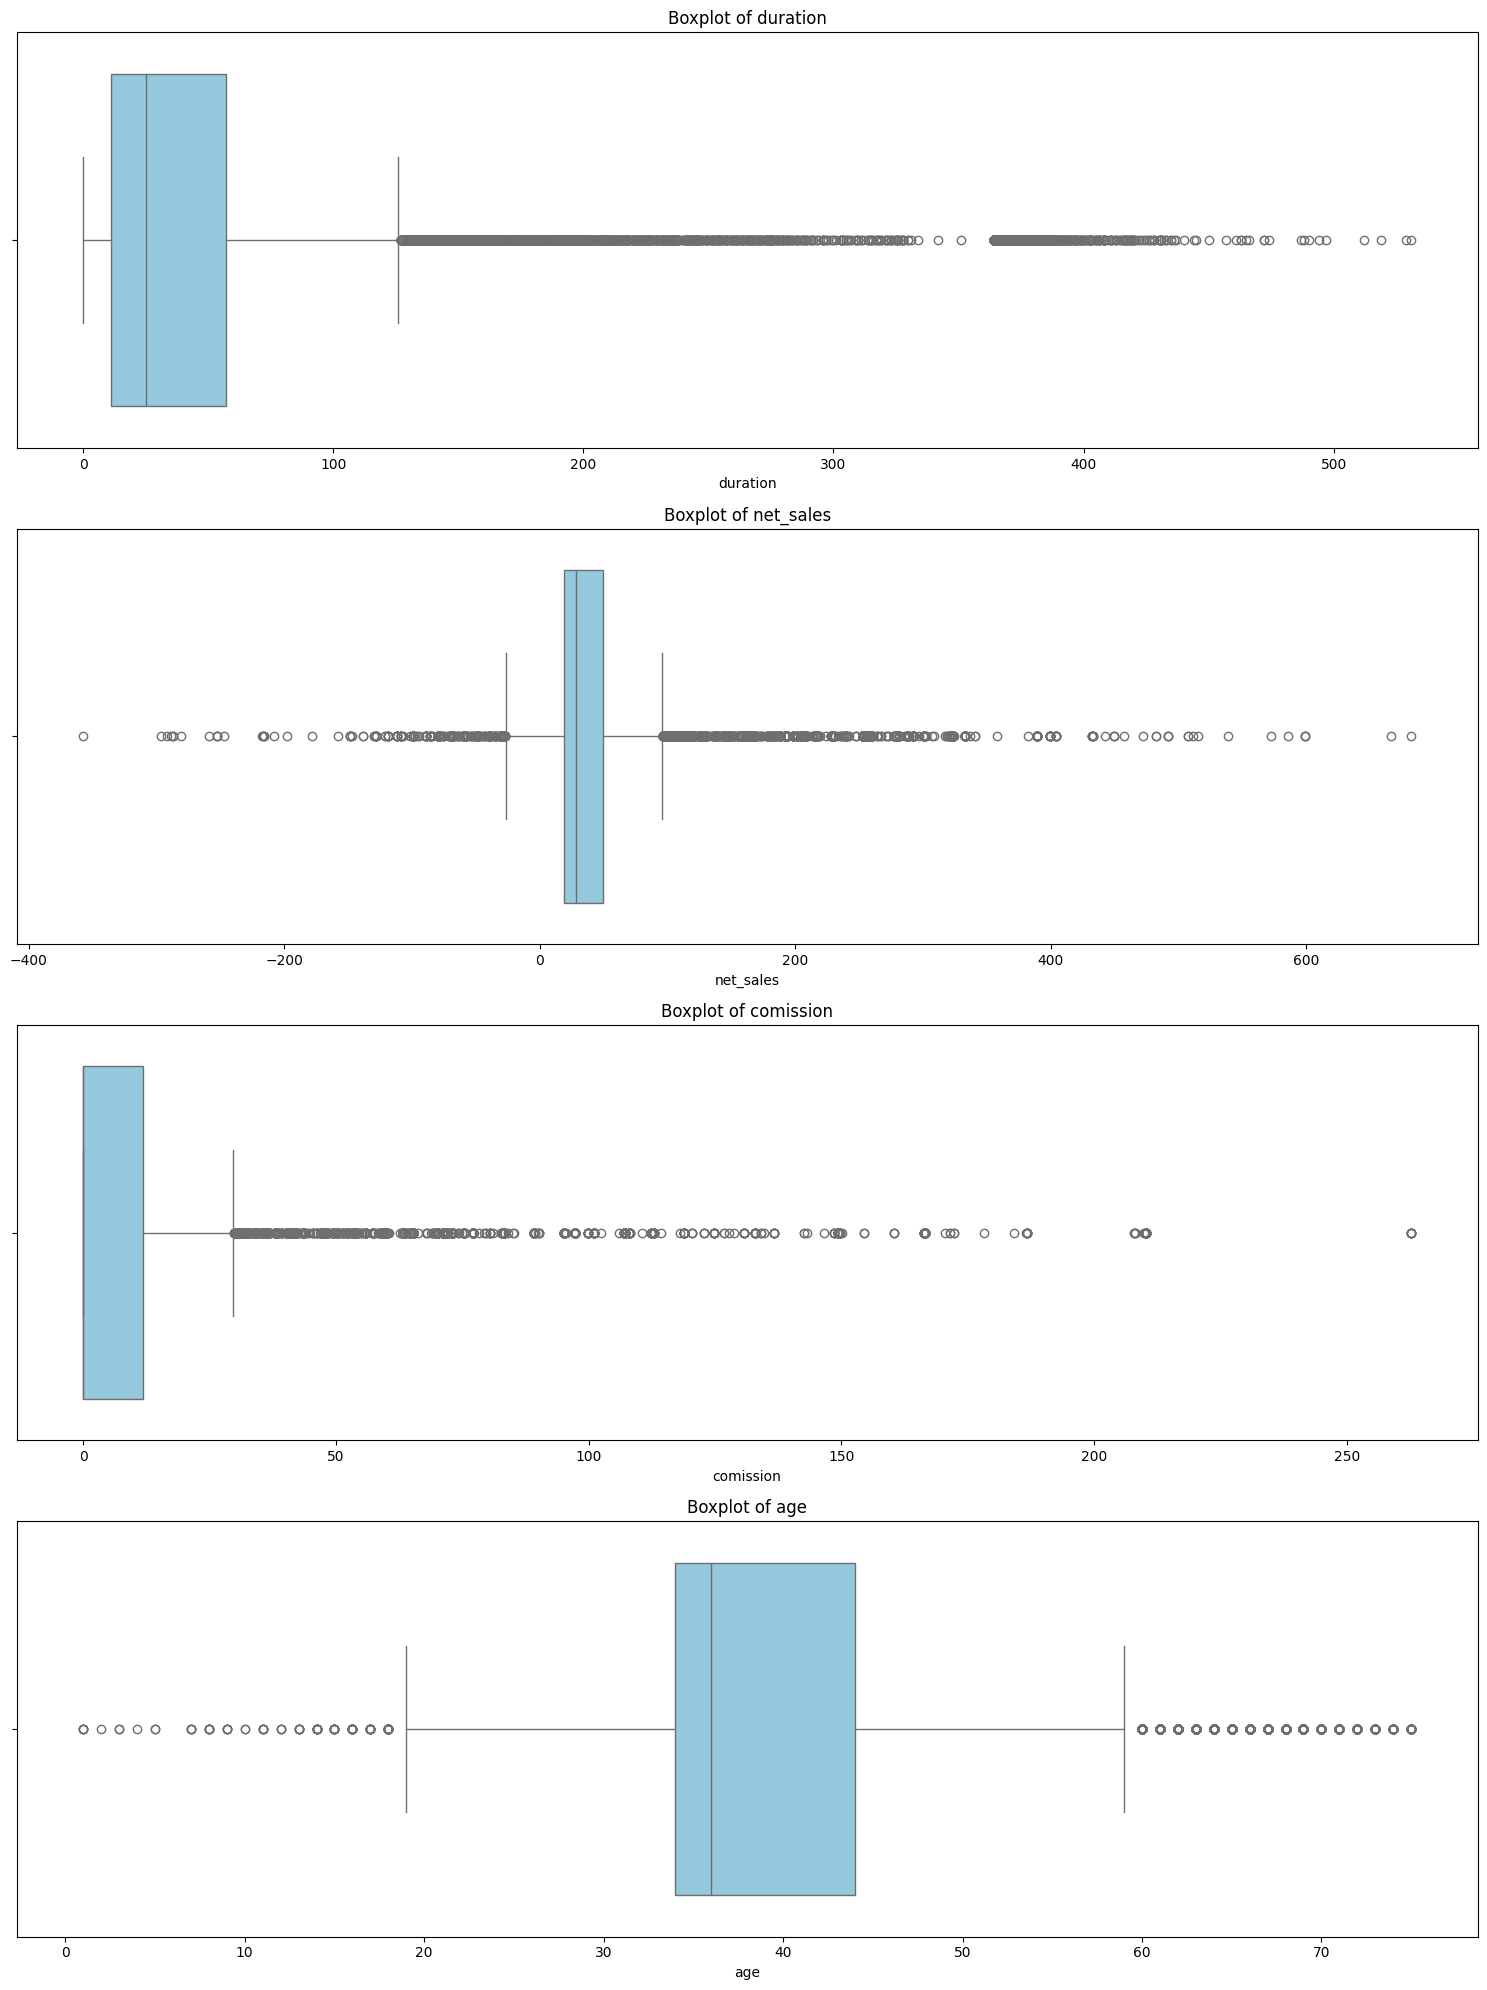

In [167]:
# Melihat distribusi data kolom numerik menggunakan boxplot
kolom_boxplot = [
   'duration', 'net_sales', 'comission','age']

plt.figure(figsize=(15, 20))

for i, kolom in enumerate(kolom_boxplot, 1):
    plt.subplot(len(kolom_boxplot), 1, i)
    sns.boxplot(x=dfUse[kolom], color='skyblue')
    plt.title(f'Boxplot of {kolom}')
    plt.xlabel(kolom)

plt.tight_layout()
plt.show()


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

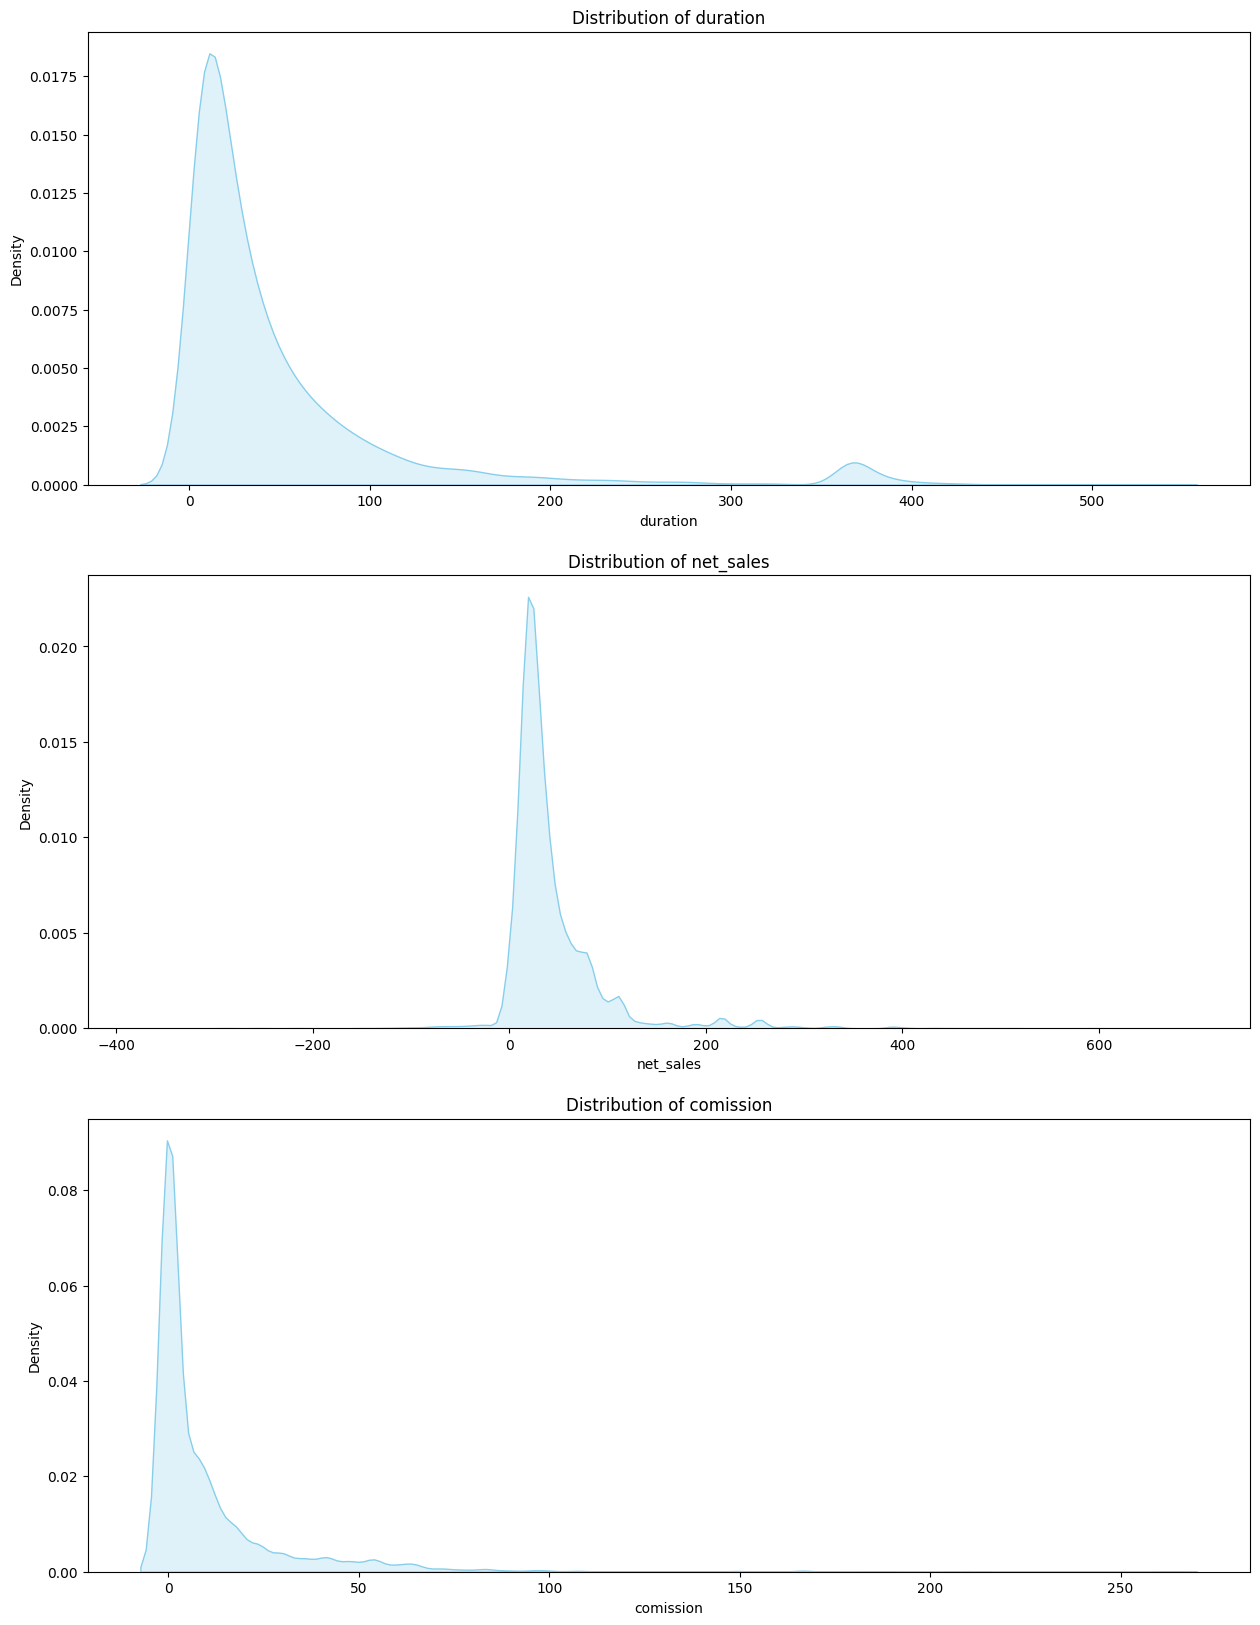

In [168]:
kolom_kde = [
    'duration', 'net_sales', 'comission',
]

plt.figure(figsize=(15, 20))

for i, kolom in enumerate(kolom_kde, 1):
    plt.subplot(len(kolom_kde), 1, i)
    sns.kdeplot(data=dfUse, x=kolom, fill=True, color='skyblue')
    plt.title(f'Distribution of {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Density')

plt.tight_layout


Berdasarkan isi data kategori masing-masing kolom, hal yang dapat dilakukan untuk feature enginering ini 
1. Melakukan Hot Enconding untuk kolom agency_type,distribution_channel,claim
2. Melakukan Binary code pada kolom agency_name,product_name,destination

Kemudian untuk data numerik, akan dilakukan metode scaling

Berdasarkan temuan boxplot, dapat menggunakan RobustScaler karena ditemukan banyak outlier.


In [169]:
df[['agency_type','distribution_channel','claim']].head()


,agency_type,distribution_channel,claim
0,Airlines,Online,No
1,Travel Agency,Online,No
2,Airlines,Online,No
3,Travel Agency,Online,No
4,Airlines,Online,No


In [170]:
cek = dfUse.drop(columns=['agency','product_name','destination','agency_type','distribution_channel','claim'])


In [171]:
data_corr = cek.corr()


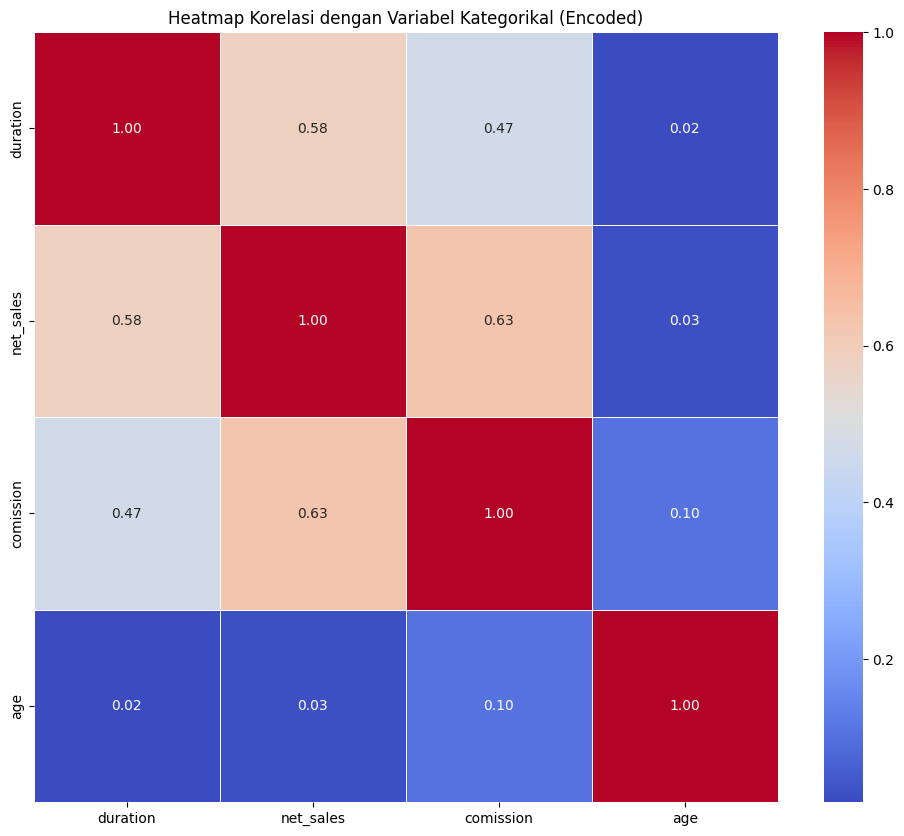

In [172]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi dengan Variabel Kategorikal (Encoded)')
plt.show()


  Berdasarkan heatmap diatas ditemukan korelasi yaitu:
  1. Semakin tinggi niali net_sales semakin tinggi juga nilai comission
  2. Semakin tinggi nilai duration semakin tinggi nilai comission
  3. Semakin tinggi nilai duration semakin tinggi nilai net_sales

  hal ini perlu diperhatikan nantinya akan ada kemungkinan multikol antara variabel yg menyebabkan asusmsi untuk regresi logistik.

## Feature Selection

In [173]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from category_encoders import BinaryEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix,confusion_matrix,ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler,SMOTENC
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingClassifier


# Evaluation
from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score,
    classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, make_scorer, recall_score  # optional kalau nanti mau dipakai lagi
)
from sklearn.model_selection import cross_val_predict, StratifiedKFold, cross_validate, RandomizedSearchCV, GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import uniform
import warnings
# Nonaktifkan semua warning
warnings.filterwarnings("ignore")


## **Encoding & Base Model**

In [183]:
dfUse['claim'] = dfUse['claim'].replace({'Yes': 1, 'No': 0})
onehot_category = ['agency_type', 'distribution_channel']
numerical_features = ['duration', 'net_sales', 'comission', 'age']
binary_category = ['agency', 'product_name', 'destination']

# Membagi data menjadi fitur (X) dan target (y)
X = dfUse.drop('claim', axis=1)  # Misalnya 'claim' adalah target
y = dfUse['claim']  # Kolom target 'claim'

# Membuat ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), numerical_features),
        ('onehot', OneHotEncoder(), onehot_category),
        ('binary', BinaryEncoder(), binary_category)
    ],
    remainder='passthrough'
)

# Menyiapkan model-model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient":GradientBoostingClassifier(random_state=42),
    "LightGBM":LGBMClassifier(random_state=42),
}
# Split data dengan stratifikasi untuk menjaga distribusi label pada 'claim'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Setup stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
results = []
# Loop tiap model
for name, model in models.items():
    clf = ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    clf.fit(X_train, y_train)
    # Cross-val prediction dengan pipeline
    y_pred_train = cross_val_predict(clf, X_train, y_train, cv=cv)
    y_pred_test = clf.predict(X_test) 
    
    print(f"\n=== {name} (Train Cross-Validated) ===")
    print(classification_report(y_train, y_pred_train))
    print(f"\n=== {name} (Test Cross-Validated) ===")
    print(classification_report(y_test, y_pred_test))

    acc_score_train = accuracy_score(y_train,y_pred_train)
    acc_score_test = accuracy_score(y_test,y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
     # Menyimpan hasil ke dalam list
    results.append({
        'Model': name,
        'Train Accuracy': acc_score_train,
        'Test Accuracy': acc_score_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test
    })

# Mengonversi hasil ke dalam DataFrame
results_df = pd.DataFrame(results)

# Menampilkan hasil dalam bentuk tabel
results_df



=== Logistic Regression (Train Cross-Validated) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30443
           1       0.00      0.00      0.00       530

    accuracy                           0.98     30973
   macro avg       0.49      0.50      0.50     30973
weighted avg       0.97      0.98      0.97     30973


=== Logistic Regression (Test Cross-Validated) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7611
           1       0.00      0.00      0.00       133

    accuracy                           0.98      7744
   macro avg       0.49      0.50      0.50      7744
weighted avg       0.97      0.98      0.97      7744


=== XGBoost (Train Cross-Validated) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30443
           1       0.17      0.01      0.02       530

    accuracy                        

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall
0,Logistic Regression,0.982824,0.982825,0.000000,0.0
1,XGBoost,0.982146,0.981792,0.011321,0.0
2,Gradient,0.982598,0.982567,0.003774,0.0
3,LightGBM,0.982243,0.982438,0.001887,0.0


**Evaluating Base Model**


Pipeline diatas dibuat untuk melihat peforma model jika belum dilakukan resampling serta hyperparamater tuning. Terlihat jelas dari hasil yang diberikan bahwa kelas 1 atau ya dalam kasus claim asuransi sangat kecil nilai metric recallnya. Namun melihat accuracy model menunjukkan bahwa hasil training dan test yang baik dimana tidak terjadi overfitting dan under fitting. Dikarenakan fokus utama dalam permasalahan ini adalah model mampu menangkap orang yang mengajukan klaim alias mampu menangkap kelas 1. Karenanya akan dilakukan penanganan imbalanced dataset terlebih dahulu menggunakan SMOTE.


Namun sebelum lanjut penanganan imbalanced data, dikarekana menggunakan regresi logistik kita perlu melakukan uji asumsi terhadap regresi logistik.

In [175]:
dfUse['claim'] = dfUse['claim'].replace({'Yes': 1, 'No': 0})
onehot_category = ['agency_type', 'distribution_channel']
onehot_category = ['agency_type', 'distribution_channel']
numerical_features = ['duration', 'net_sales', 'comission', 'age']
binary_category = ['agency', 'product_name', 'destination']

# Membagi data menjadi fitur (X) dan target (y)
X = dfUse.drop('claim', axis=1)  # Misalnya 'claim' adalah target
y = dfUse['claim']  # Kolom target 'claim'

# Membuat ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), numerical_features),
        ('onehot', OneHotEncoder(), onehot_category),
        ('binary', BinaryEncoder(), binary_category)
    ],
    remainder='passthrough'
)

# Terapkan ColumnTransformer pada data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Cek jumlah kolom setelah preprocessing dan ambil nama kolom
list_all_col = []

# Loop untuk mengambil nama kolom hasil encoding
for i in range(len(preprocessor.transformers_)):
    if hasattr(preprocessor.transformers_[i][1], 'get_feature_names_out'):
        features = list(preprocessor.transformers_[i][1].get_feature_names_out())
        list_all_col += features

# Menambahkan konstanta (intercept) ke dalam fitur (X)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=list_all_col)
X_train_processed_df_with_const = sm.add_constant(X_train_processed_df)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=list_all_col)
X_test_processed_df_with_const = sm.add_constant(X_test_processed_df)

# Menghitung VIF untuk setiap kolom
vif_data = pd.DataFrame()
vif_data['feature'] = X_train_processed_df_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_processed_df_with_const.values, i)
                   for i in range(X_train_processed_df_with_const.shape[1])]

print("Nilai VIF:")
print(vif_data)

# Menghapus fitur dengan VIF tinggi (inf)
features_to_drop = vif_data[vif_data['VIF'] > 5]['feature']
X_train_processed_df = X_train_processed_df.drop(columns=features_to_drop)

# Cek kembali VIF setelah penghapusan fitur
X_train_processed_df_with_const = sm.add_constant(X_train_processed_df)
vif_data_updated = pd.DataFrame()
vif_data_updated['feature'] = X_train_processed_df_with_const.columns
vif_data_updated['VIF'] = [variance_inflation_factor(X_train_processed_df_with_const.values, i)
                            for i in range(X_train_processed_df_with_const.shape[1])]
print("NIlai VIF Setelah Penghapusan:")
print(vif_data_updated)


Nilai VIF:
                   feature       VIF
0                    const  0.000000
1                 duration  1.735074
2                net_sales  2.569531
3                comission  3.628280
4                      age  1.089461
5            agency_type_1       inf
6            agency_type_2       inf
7   distribution_channel_1       inf
8   distribution_channel_2       inf
9                 agency_0  2.780904
10                agency_1  6.446241
11                agency_2  5.892707
12                agency_3  4.139053
13          product_name_0  2.471314
14          product_name_1  2.622839
15          product_name_2  5.589676
16          product_name_3  1.512691
17          product_name_4  3.793400
18           destination_0  1.011002
19           destination_1  1.040979
20           destination_2  1.266877
21           destination_3  1.356798
22           destination_4  1.353167
23           destination_5  1.251715
24           destination_6  1.258046
NIlai VIF Setelah Penghapus

Berdasarkan tabel nilai vif,
Sebelum nilai vif didrop terdapat kolom yang terdeteksi multikol tinggi agency_type dengan distribution_channel. Keduanya memiliki kolinearietas sempurna dimana nilainya inf (sudah terlalu tinggi). Selain itu terdapat kolom lain yaitu agency_1,agency_2 dan product_name_2 yang memiliki nilai VIF diatas 5 yang dapat menyebabkan multikol berlebih. Makan untuk nilai VIF > 5 akan dihapus. Setelah penghapusan kolom tersebut, kolom yang tersisa memiliki nilai VIF < 5 yang artinya masalah multikol sudah teratasi.


In [176]:

# Reset index untuk memastikan kedua data memiliki index yang sama
X_train_processed_df = X_train_processed_df.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Tambahkan konstanta (intercept) ke dalam fitur (X)
X_train_processed_df_with_const = sm.add_constant(X_train_processed_df)

# Latih model Logistic Regression dengan statsmodels
sm_logit = sm.Logit(y_train, X_train_processed_df_with_const)  # y_train adalah target, X_train_processed_df_with_const adalah fitur
result = sm_logit.fit()

# Menampilkan hasil ringkasan model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.073633
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  claim   No. Observations:                30973
Model:                          Logit   Df Residuals:                    30955
Method:                           MLE   Df Model:                           17
Date:                Fri, 23 May 2025   Pseudo R-squ.:                  0.1495
Time:                        18:49:06   Log-Likelihood:                -2280.6
converged:                       True   LL-Null:                       -2681.5
Covariance Type:            nonrobust   LLR p-value:                1.968e-159
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.1797      0.244    -13.009      0.000      -3.659      -2.701
duration         

##### **LLR Test:**
P-Value dari Log-Likelihood Ratio (LLR) digunakan untuk menguji apakah model yang lebih kompleks (dengan lebih banyak variabel) memberikan perbaikan yang signifikan dibandingkan dengan model yang lebih sederhana.  

- **Hipotesis Null (H₀):** Model yang lebih sederhana tidak lebih buruk daripada model yang lebih kompleks (artinya, fitur tambahan tidak memberikan peningkatan yang signifikan).
- **Hipotesis Alternatif (H₁):** Model yang lebih kompleks memberikan perbaikan yang signifikan dibandingkan dengan model yang lebih sederhana (artinya, fitur tambahan berpengaruh).

Kemuduian untuk LLR P-Value sebesar : 1.968e-159 yang artinya , jika p-value < 0.05 maka tolak H₀. Artinya model yang lebih komplek dapat memberikan perbaikan yang signiifikan dibandingka dengan model sedederhana (menambah fitur dapat mempengaruhi model)

##### **Wald Test:**
Wald Test digunakan untuk menguji signifikansi koefisien masing-masing variabel dalam model regresi.  
Untuk setiap koefisien, kita menguji apakah koefisien tersebut berbeda secara signifikan dari 0.  

- **Hipotesis Null (H₀):** Koefisien variabel tersebut tidak berbeda signifikan dari 0 (artinya variabel tidak berpengaruh terhadap variabel dependen).
- **Hipotesis Alternatif (H₁):** Koefisien variabel tersebut berbeda signifikan dari 0 (artinya variabel berpengaruh terhadap variabel dependen).

-----
Intepretasi:
- const = p-value < 0.05 intercept model
- duration = p-value <0.05 duration menurunkan kemungkinan claim asuransi
- net_sales = p-value < 0.05 net sales menaikkan kemungkinan claim asuransi
- age = p-value < 0.05 age menurunkan kemungkinan claim asuransi
- agency_3 = p-value < 0.05 agency_3 menurunkan kemungkinan claim asuransi
- product_name_0 = p-value < 0.05 produc_name_0 menaikkan kemungkinan claim asuransi
- product_name_1 = p-value < 0.05 product_name_1 menurunkan kemungkinan claim asuransi
- product_name_3 = net_sales = p-value < 0.05 product_name_3 menurunkan kemungkinan claim asuransi
- product_name_4 = net_sales = p-value < 0.05 product_name_4 menaikkan kemungkinan claim asuransi
- destination_2 = net_sales = p-value < 0.05 destination_2 menurunkan kemungkinan claim asuransi
- destination_3 = net_sales = p-value < 0.05 destination_3 menurunkan kemungkinan claim asuransi

In [47]:
# Mengambil hasil koefisien dan p-value dari model
wald_results = result.summary2().tables[1]  # Mengambil hasil summary yang berisi koefisien dan p-value

# Menyaring fitur dengan p-value < 0.05
significant_features = wald_results[wald_results['P>|z|'] < 0.05].index.tolist()

print("\nFitur yang Signifikan (p-value < 0.05):")
print(significant_features)
# Menyaring X_train dan X_test berdasarkan fitur yang signifikan
X_train_significant = X_train_processed_df_with_const[significant_features]
X_test_significant = X_test_processed_df_with_const[significant_features]



Fitur yang Signifikan (p-value < 0.05):
['const', 'duration', 'net_sales', 'age', 'agency_3', 'product_name_0', 'product_name_1', 'product_name_3', 'product_name_4', 'destination_2', 'destination_3']


11 fitur di atas merupakan fitur yang penting dalam penggunaan regresi logistik. Karena sudah memenuhi beberapa asusmsi yang harus terpenuhi seperti Wald-Test dan LLR

## Imbalanced Dataset
karena data kita imbalanced, maka kita harus melakukan resampling dimana kasus yang dihadapi adala kelas mayoritas 0 sehingga teknik yang digunakan adalah menggunakan SMOTE sampling untuk membuat data sintetis dengan harapan menaikkan jumlah data minoritas

In [184]:

# Ubah Sex: Male = 1, Female = 0
dfUse['claim'] = dfUse['claim'].replace({'Yes': 1, 'No': 0})
onehot_category = ['agency_type', 'distribution_channel']
numerical_features = ['duration', 'net_sales', 'comission', 'age']
binary_category = ['agency', 'product_name', 'destination']

# Membagi data menjadi fitur (X) dan target (y)
X = dfUse.drop('claim', axis=1)  # Misalnya 'claim' adalah target
y = dfUse['claim']  # Kolom target 'claim'

# Membuat ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), numerical_features),
        ('onehot', OneHotEncoder(), onehot_category),
        ('binary', BinaryEncoder(), binary_category)
    ],
    remainder='passthrough'
)

# Menyiapkan model-model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "Gradient": GradientBoostingClassifier(random_state=42)
}
# Hasil untuk SMOTE dan Random Oversampling
smote_results = []
oversample_results = []
# Split data dengan stratifikasi untuk menjaga distribusi label pada 'claim'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Setup stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# Loop tiap model untuk SMOTE dan Random Oversampling
for name, model in models.items():
    # Pipeline dengan SMOTE
    clf_smote = ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=1)),
        ("classifier", model)
    ])
    # Pipeline dengan Random Oversampling
    clf_oversample = ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("oversample", RandomOverSampler(random_state=1)),
        ("classifier", model)
    ])
    # Fit dan prediksi untuk SMOTE
    clf_smote.fit(X_train, y_train)
    y_pred_train_smote = cross_val_predict(clf_smote, X_train, y_train, cv=cv)
    y_pred_test_smote = clf_smote.predict(X_test)
    
    # Fit dan prediksi untuk Random Oversampling
    clf_oversample.fit(X_train, y_train)
    y_pred_train_oversample = cross_val_predict(clf_oversample, X_train, y_train, cv=cv)
    y_pred_test_oversample = clf_oversample.predict(X_test)

    # Output: Classification Report untuk Training dan Test Set
    print(f"Train-Test SMOTE")
    print(f"\n=== {name} (Train Cross-Validated) ===")
    print(classification_report(y_train, y_pred_train_smote))
    
    print(f"\n=== {name} (Test Cross-Validated) ===")
    print(classification_report(y_test, y_pred_test_smote))
    
    acc_score_train_smote = accuracy_score(y_train, y_pred_train_smote)
    acc_score_test_smote = accuracy_score(y_test, y_pred_test_smote)
    recall_train_smote = recall_score(y_train, y_pred_train_smote)
    recall_test_smote = recall_score(y_test, y_pred_test_smote)
    
    smote_results.append({
        'Model': name,
        'Train Accuracy (SMOTE)': acc_score_train_smote,
        'Test Accuracy (SMOTE)': acc_score_test_smote,
        'Train Recall (SMOTE)': recall_train_smote,
        'Test Recall (SMOTE)': recall_test_smote
    })
    print(f"Train-Test Oversampling")
    # Output: Classification Report untuk Training dan Test Set
    print(f"\n=== {name} (Train Cross-Validated) ===")
    print(classification_report(y_train, y_pred_train_oversample))
    
    print(f"\n=== {name} (Test Cross-Validated) ===")
    print(classification_report(y_test, y_pred_test_oversample))
    # Evaluasi untuk Random Oversampling
    acc_score_train_oversample = accuracy_score(y_train, y_pred_train_oversample)
    acc_score_test_oversample = accuracy_score(y_test, y_pred_test_oversample)
    recall_train_oversample = recall_score(y_train, y_pred_train_oversample)
    recall_test_oversample = recall_score(y_test, y_pred_test_oversample)
    
    oversample_results.append({
        'Model': name,
        'Train Accuracy (Oversampling)': acc_score_train_oversample,
        'Test Accuracy (Oversampling)': acc_score_test_oversample,
        'Train Recall (Oversampling)': recall_train_oversample,
        'Test Recall (Oversampling)': recall_test_oversample
    })


# Mengonversi hasil ke dalam DataFrame
smote_results_df = pd.DataFrame(smote_results)
oversample_results_df = pd.DataFrame(oversample_results)


Train-Test SMOTE

=== Logistic Regression (Train Cross-Validated) ===
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     26637
           1       0.06      0.70      0.11       464

    accuracy                           0.81     27101
   macro avg       0.53      0.76      0.50     27101
weighted avg       0.98      0.81      0.88     27101


=== Logistic Regression (Test Cross-Validated) ===
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     11417
           1       0.06      0.66      0.11       199

    accuracy                           0.82     11616
   macro avg       0.53      0.74      0.50     11616
weighted avg       0.98      0.82      0.89     11616

Train-Test Oversampling

=== Logistic Regression (Train Cross-Validated) ===
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     26637
           1       0.06      0.70     

In [185]:
# Menampilkan hasil dalam bentuk tabel
smote_results_df



,Model,Train Accuracy (SMOTE),Test Accuracy (SMOTE),Train Recall (SMOTE),Test Recall (SMOTE)
0,Logistic Regression,0.810265,0.817837,0.702586,0.663317
1,XGBoost,0.945426,0.944559,0.215517,0.216080
2,LightGBM,0.940740,0.935692,0.267241,0.261307
3,Gradient,0.885834,0.875430,0.568966,0.482412


Berdasarkan hasil resampling menggunakan SMOTE didapatkan bahwa hasil metrik recall yang mendekati nilai terbaik adalah metrik recall pada model Regresi Logisctic dengan nilai recall sebesar 66% dengan akurasi mengalami penurunan menjadi 82%. Karena melihat angka recall yang mungkin dapat dikejar untuk dinaikkan nilainya maka untuk proses hyperparamater tuning, kita menggunakan Regresi Logistic dan mempertimbangkan model lain juga.

In [186]:
oversample_results_df


,Model,Train Accuracy (Oversampling),Test Accuracy (Oversampling),Train Recall (Oversampling),Test Recall (Oversampling)
0,Logistic Regression,0.818531,0.819387,0.696121,0.643216
1,XGBoost,0.935685,0.925275,0.321121,0.271357
2,LightGBM,0.890299,0.879304,0.502155,0.482412
3,Gradient,0.831630,0.832559,0.676724,0.638191


Berdasarkan hasil resampling menggunakan OverSampling didapatkan bahwa untuk hasil test akurasi dan recall mengalami penurunan hasil. Dimana ini menjadi indikasi overfitting. Untuk itu penggunaan SMOTE lebih disarankan, melihat hasil akurasi dan recall yang stabil.

# HyperParameter Tuning


## Regresi Logistik

In [188]:
# Fitur kategorikal dan numerikal
dfUse['claim'] = dfUse['claim'].replace({'Yes': 1, 'No': 0})
onehot_category = ['agency_type', 'distribution_channel']
numerical_features = ['duration', 'net_sales', 'comission', 'age']
binary_category = ['agency', 'product_name', 'destination']

# Membagi data menjadi fitur (X) dan target (y)
X = dfUse.drop('claim', axis=1)  # Misalnya 'claim' adalah target
y = dfUse['claim']  # Kolom target 'claim'

# Split data dengan stratifikasi untuk menjaga distribusi label pada 'claim'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Membuat ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), numerical_features),
        ('onehot', OneHotEncoder(), onehot_category),
        ('binary', BinaryEncoder(), binary_category)
    ],
    remainder='passthrough'
)

# Membuat pipeline untuk Logistic Regression tanpa SMOTE (untuk evaluasi)
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=1,sampling_strategy=0.5)),
    ("classifier", LogisticRegression(class_weight='balanced'))
])

# Menyiapkan parameter grid untuk hyperparameter tuning
param_dist= {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Optimizer
    'classifier__penalty': ['l2', 'none'],  # Regularization method
    'classifier__max_iter': [100, 1000, 2000],  # Max iterations
    'classifier__tol': [1e-4, 1e-5]  # Tolerance for stopping criteria
}
# Setup StratifiedKFold for Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Menyiapkan GridSearchCV untuk melakukan tuning
random_search_logreg = RandomizedSearchCV(pipeline, param_distributions= param_dist, cv=cv, scoring='recall', n_jobs=-1, verbose=1)

# Melatih model dengan GridSearchCV
random_search_logreg.fit(X_train, y_train)
y_pred_train = random_search_logreg.predict(X_train)

# Prediksi dengan model terbaik pada data train
y_pred_train = random_search_logreg.predict(X_train)

# Prediksi dengan model terbaik pada data test
y_pred_test = random_search_logreg.predict(X_test)

# Menghitung accuracy dan recall untuk data train dan test
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))
# Menampilkan classification report pada data test
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Menyimpan hasil ke dalam list
results = {
    'Model': 'Logreg with SMOTE',
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train Recall': recall_train,
    'Test Recall': recall_test
}

# Mengonversi hasil ke dalam DataFrame
results_logreg_df = pd.DataFrame([results])


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     26637
           1       0.07      0.70      0.12       464

    accuracy                           0.83     27101
   macro avg       0.53      0.76      0.51     27101
weighted avg       0.98      0.83      0.89     27101


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     11417
           1       0.06      0.66      0.11       199

    accuracy                           0.82     11616
   macro avg       0.53      0.74      0.51     11616
weighted avg       0.98      0.82      0.89     11616



## Tree Based Model

## XGBoost
 XGBoost merupakan model yang menggunakan boosting untuk memperbaiki kesalahan prediksi dengan membangun pohon keputusan secara iteratif. XGBoost lebih efisien dalam hal komputasi dan dapat menangani data yang besar dengan lebih cepat.

In [189]:
# Membuat pipeline untuk XGBoost SMOTE
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=1)),
    ("classifier", XGBClassifier())
])

# Menyiapkan parameter distribusi untuk RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': [100, 200, 500],  # Jumlah pohon yang digunakan
    'classifier__learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'classifier__max_depth': [3, 5, 10, 15],  # Maksimum kedalaman pohon
    'classifier__subsample': [0.8, 1.0],  # Persentase sampel untuk membangun pohon
    'classifier__colsample_bytree': [0.8, 1.0],  # Fraction of features untuk membangun pohon
    'classifier__gamma': [0, 0.1, 0.2]  # Regularization parameter
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Setup RandomizedSearchCV untuk pencarian parameter terbaik
random_search_xgb = RandomizedSearchCV(pipeline, param_distributions=param_dist, 
                                       n_iter=50, cv=cv, scoring='recall', n_jobs=-1, verbose=1, random_state=42)

# Melatih model dengan RandomizedSearchCV
random_search_xgb.fit(X_train, y_train)

# Prediksi dengan model terbaik pada data train
y_pred_train = random_search_xgb.predict(X_train)

# Prediksi dengan model terbaik pada data test
y_pred_test = random_search_xgb.predict(X_test)

# Menghitung accuracy dan recall untuk data train dan test
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))
# Menampilkan classification report pada data test
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Menyimpan hasil ke dalam list
results = {
    'Model': 'XGBoost with SMOTE',
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train Recall': recall_train,
    'Test Recall': recall_test
}

# Mengonversi hasil ke dalam DataFrame
results_xgb_df = pd.DataFrame([results])



Fitting 5 folds for each of 50 candidates, totalling 250 fits

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     26637
           1       0.07      0.69      0.13       464

    accuracy                           0.84     27101
   macro avg       0.53      0.77      0.52     27101
weighted avg       0.98      0.84      0.90     27101


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     11417
           1       0.06      0.64      0.11       199

    accuracy                           0.83     11616
   macro avg       0.53      0.73      0.51     11616
weighted avg       0.98      0.83      0.89     11616



## GradientBoosting

Gradient Boosting adalah metode ensemble yang menggunakan banyak pohon keputusan untuk melakukan prediksi. Setiap pohon yang baru ditambahkan berfokus pada kesalahan yang dibuat oleh pohon sebelumnya. Model ini membangun pohon keputusan secara sekuensial dan menggunakan gradien untuk memperbaiki kesalahan pada pohon sebelumnya.

In [190]:
# Pipeline GradientBoosting dengan SMOTE
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

# Definisikan space parameter untuk Gradient Boosting
params = {
    'classifier__n_estimators': [50, 100, 150, 200, 250, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'classifier__max_depth': [3, 4, 5, 6, 7],
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 5, 10],
    'classifier__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'classifier__max_features': ['sqrt', 'log2', None],
}


# Random search untuk tuning hyperparameter
random_search_gdb= RandomizedSearchCV(
    pipeline,
    param_distributions=params,
    n_iter=30,  # Jumlah kombinasi yang dicoba
    scoring='recall',  # Memilih recall sebagai metrik evaluasi
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Melatih model dengan RandomizedSearchCV
random_search_gdb.fit(X_train, y_train)

# Prediksi dengan model terbaik pada data train
y_pred_train = random_search_gdb.predict(X_train)

# Prediksi dengan model terbaik pada data test
y_pred_test = random_search_gdb.predict(X_test)

# Menghitung accuracy dan recall untuk data train dan test
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))
# Menampilkan classification report pada data test
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Menyimpan hasil ke dalam list
results = {
    'Model': 'GDB with SMOTE',
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train Recall': recall_train,
    'Test Recall': recall_test
}

# Mengonversi hasil ke dalam DataFrame
results_gdb_df = pd.DataFrame([results])


Fitting 5 folds for each of 30 candidates, totalling 150 fits

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     26637
           1       0.06      0.73      0.11       464

    accuracy                           0.81     27101
   macro avg       0.53      0.77      0.50     27101
weighted avg       0.98      0.81      0.88     27101


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     11417
           1       0.05      0.67      0.10       199

    accuracy                           0.79     11616
   macro avg       0.52      0.73      0.49     11616
weighted avg       0.98      0.79      0.87     11616



## LightGBM
LightGBM adalah algoritma gradient boosting berbasis pohon keputusan yang sangat efisien dalam hal kecepatan dan memori. LightGBM membangun pohon-pohon keputusan secara iteratif dan menggunakan teknik leaf-wise yang dapat mengurangi kesalahan lebih cepat dibandingkan dengan metode tradisional level-wise yang digunakan oleh algoritma seperti XGBoost.

In [193]:
# Membuat pipeline LightGBM  dengan SMOTE
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),  # SMOTE untuk menangani imbalanced class
    ("classifier", LGBMClassifier(random_state=42))
])

# Menyiapkan parameter distribusi untuk RandomizedSearchCV
param_dist = {
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__num_leaves': [31, 50], 
    'classifier__n_estimators': [100, 200], 
    'classifier__max_depth': [-1, 5, 10], 
    'classifier__subsample': [0.7, 0.8, 1.0], 
    'classifier__colsample_bytree': [0.7, 1.0], 
    'classifier__min_child_samples': [5, 10],  
}
# Setup RandomizedSearchCV untuk pencarian parameter terbaik
random_search_lgbm = RandomizedSearchCV(pipeline, param_distributions=param_dist, 
                                        n_iter=30, cv=5, scoring='recall', n_jobs=-1, verbose=1, random_state=42)

# Melatih model dengan RandomizedSearchCV
random_search_lgbm.fit(X_train, y_train)

# Prediksi dengan model terbaik pada data train
y_pred_train = random_search_lgbm.predict(X_train)

# Prediksi dengan model terbaik pada data test
y_pred_test = random_search_lgbm.predict(X_test)

# Menghitung accuracy dan recall untuk data train dan test
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))
# Menampilkan classification report pada data test
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Menyimpan hasil ke dalam list
results = {
    'Model': 'LGBM with SMOTE',
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train Recall': recall_train,
    'Test Recall': recall_test
}

# Mengonversi hasil ke dalam DataFrame
results_lgbm_df = pd.DataFrame([results])


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 26637, number of negative: 26637
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5427
[LightGBM] [Info] Number of data points in the train set: 53274, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [200]:
combined_results = pd.concat([results_logreg_df, results_xgb_df, results_gdb_df, results_lgbm_df], ignore_index=True)
combined_results


,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall
0,Logreg with SMOTE,0.826759,0.821453,0.700431,0.663317
1,XGBoost with SMOTE,0.836316,0.828168,0.693966,0.638191
2,GDB with SMOTE,0.805542,0.793733,0.728448,0.673367
3,LGBM with SMOTE,0.867164,0.862689,0.665948,0.597990


Berdasarkan hasil akurasi dan recall tiap model yang telah dituning parameternya dan penggunaan smote, didapatkan pilihan model akhir yang akan digunakan yaitu Gradient Booting dengan nilai Akurasi sebesar 79 % untuk akurasi test dan 67 % untuk recall test.


# FINAL MODEL

In [201]:
#menggunakan logistic regression
best_model_pipeline = random_search_gdb.best_estimator_
best_model_pipeline[-1]


GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=5,
                           min_samples_split=10, random_state=42,
                           subsample=0.8)

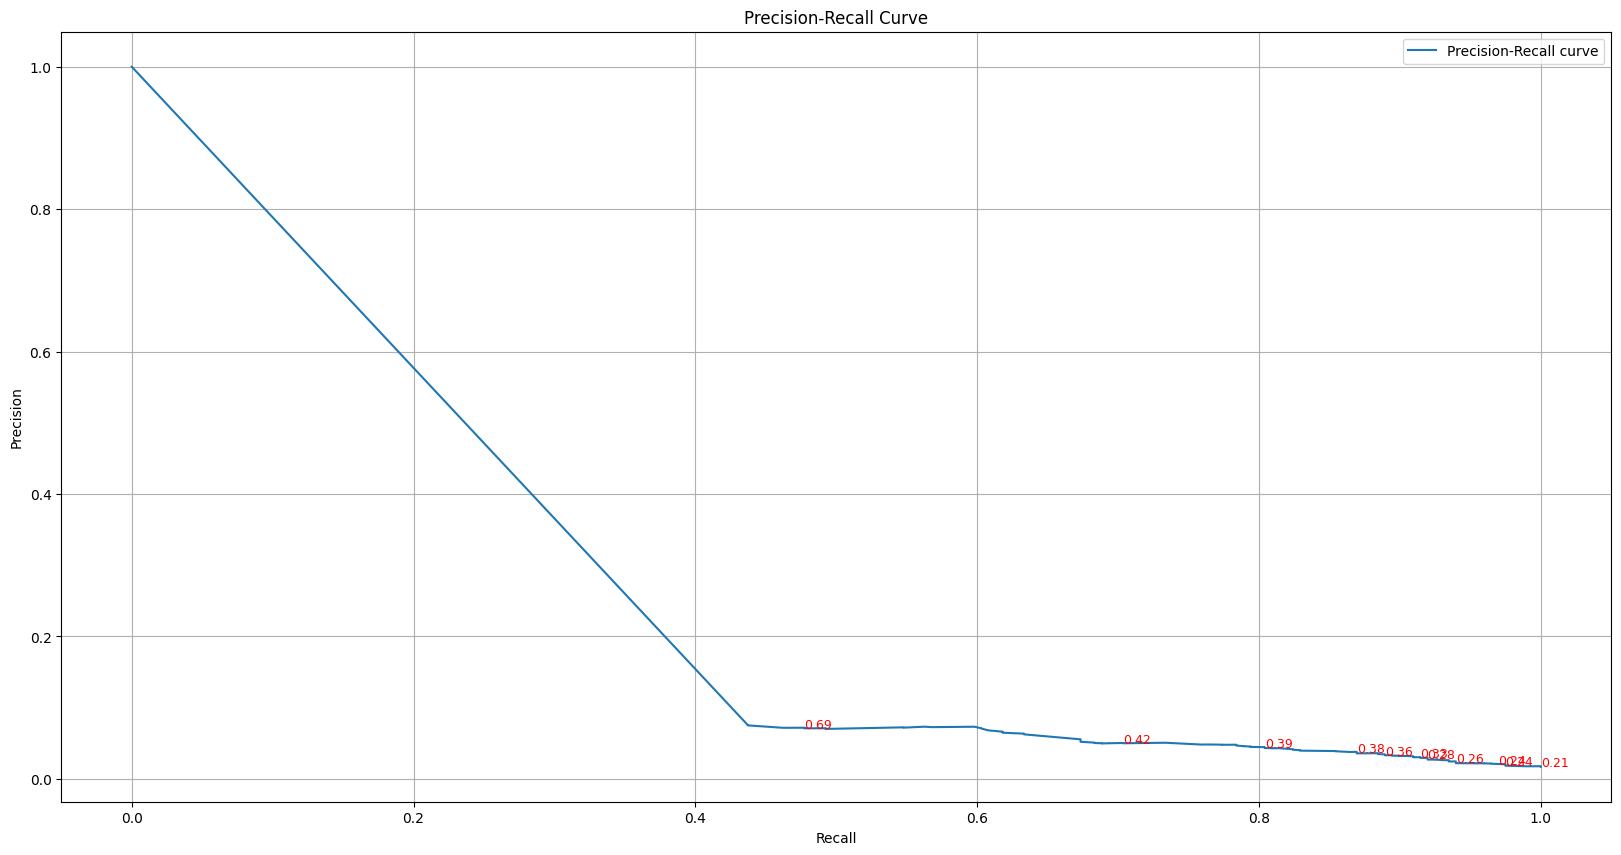

Precision-Recall AUC: 0.0617


In [202]:
# Mendapatkan probabilitas prediksi untuk kelas positif (1)
y_prob = best_model_pipeline.predict_proba(X_test)[:, 1]

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(20, 10))
plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Menambahkan threshold pada plot dengan pengaturan step yang aman
step = max(1, len(thresholds) // 10)  # Menghindari step 0
for i in range(0, len(thresholds), step):  # Plot threshold markers
    plt.text(recall[i], precision[i], f'{thresholds[i]:.2f}', fontsize=9, color='red')

plt.legend(loc='best')
plt.grid(True)
plt.show()

# AUC untuk Precision-Recall
pr_auc = average_precision_score(y_test, y_prob)
print(f'Precision-Recall AUC: {pr_auc:.4f}')


Berdasarkan PR-Curve diatas terlihat bahwa terdapat angka-angka yang kita gunakan sebagai treshold. Karena fokus disini untuk mencari recall tertinggi dan tidak abai dengan precision. Nilai treshold yang digunakan adalah 0.4


=== Classification Report with Threshold 0.4 ===
              precision    recall  f1-score   support

           0      0.995     0.695     0.818     11417
           1      0.044     0.804     0.083       199

    accuracy                          0.697     11616
   macro avg      0.520     0.749     0.451     11616
weighted avg      0.979     0.697     0.806     11616



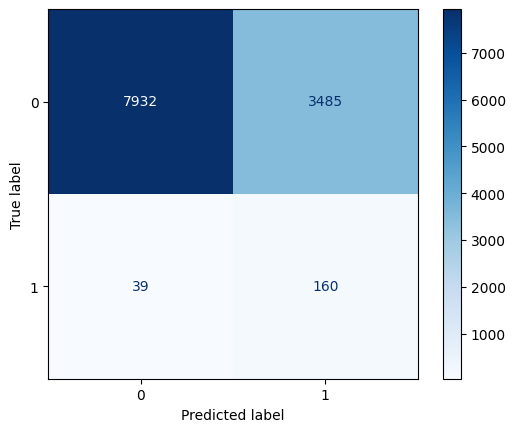

In [203]:
threshold = 0.4
y_pred_adjusted = (y_prob >= threshold).astype(int)

print(f"\n=== Classification Report with Threshold {threshold} ===")
print(classification_report(y_test, y_pred_adjusted, digits=3))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # bisa ganti cmap kalau mau warna lain


# Simpan Model yang digunakan

In [204]:
import pickle

with open('GradientBoostModel_Kemas.pkl', 'wb') as f:
    pickle.dump(best_model_pipeline, f)  # Save the model
    pickle.dump(threshold, f)   # Save the threshold

print("Model and threshold saved successfully.")


Model and threshold saved successfully.


Hasil akhir dari pencarian model yang digunakan adalah menggunakan model GradientBoosting. Dengan melakukan tuning tambahan pada model tersebut seperti memebuat data sintetik melalui SMOTE untuk menambah kelas minoritas (kelas 1). Selain itu dilakukan pencarian parameter terbaik menggunakan randomizedsearch, dimana membantu mencari parameter terbaik untuk model berdasarkan distribusi dari nilai-nilai acuann yang kita masukkan. 
Didapatkan tuningan Gradient Boosting terbaik yaitu:
- learning_rate=0.01

Learning rate mengontrol seberapa besar perubahan yang dilakukan oleh model pada setiap iterasi pembelajaran. Dengan learning_rate yang lebih kecil, model akan melakukan perubahan yang lebih kecil dan lebih hati-hati. Dalam kasus ini, nilai 0.01 berarti model berusaha untuk belajar dengan lebih lambat dan bertahap, yang dapat membantu mencegah model menjadi terlalu cepat terjebak pada pola yang kurang tepat (overfitting).

- min_samples_leaf=5,

Min_samples_leaf adalah jumlah minimum sampel (data) yang dibutuhkan dalam sebuah daun (leaf) dari pohon keputusan. Setiap kali model membagi data menjadi dua, pohon keputusan akan memastikan bahwa setiap cabang memiliki setidaknya 5 sampel di setiap daunnya. Parameter ini membantu menghindari overfitting dengan memastikan bahwa pohon keputusan tidak membuat pembagian yang terlalu spesifik yang hanya berlaku untuk sebagian kecil data.

- min_samples_split=10

Min_samples_split adalah jumlah minimum sampel yang diperlukan untuk membagi sebuah node (simpul) pada pohon keputusan. Dengan nilai 10, model hanya akan membagi node jika ada setidaknya 10 sampel di dalamnya. Ini membantu mencegah model untuk membuat terlalu banyak pembagian yang terlalu rinci pada data, sehingga mengurangi risiko overfitting.

- random_state=42,

Random_state digunakan untuk memastikan bahwa proses pembelajaran dapat direplikasi dengan hasil yang sama di setiap kali model dilatih. Dengan menetapkan nilai 42 (nilai acak), Anda dapat memastikan bahwa hasil eksperimen yang Anda lakukan dapat diulang pada percakapan berikutnya, tanpa perubahan yang tidak diinginkan dalam pembelajaran model.

- subsample=0.8

Subsample mengontrol proporsi data yang digunakan untuk melatih setiap pohon keputusan dalam ensemble. Nilai 0.8 berarti model hanya menggunakan 80% dari data untuk melatih setiap pohon secara acak. Dengan cara ini, model tidak hanya bergantung pada seluruh data, tetapi mencoba untuk menghindari overfitting dengan memanfaatkan data yang berbeda pada setiap iterasi. Ini membantu membuat model lebih general dan tidak terlalu terfokus pada pola yang sangat spesifik di data pelatihan.

Prediksi akhir model untuk akurasi sebesar 69.7% hal ini masih dapat dikatakan baik untuk sebuah nilai akurasi model. Kemudian untuk Recall yang didapatkan dari model ini untu kelas 1 yaitu sebesar 80.4 % dimana artinya model mampu menangkap sebagian  orang yang berkesempatan mengajukan klaim. Hal ini tentunya mencegah perusahaan asuransi melewatkan seseorang yang ingin klaim asuransi namun tidak terdeteksi oleh model (FN). 
Berikut intepretasi akhir model GradientBoosting melalui Confusion Matrix
- True Positives (TP): 160

Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa klaim akan terjadi (1). Artinya, ada 160 klaim yang benar-benar terjadi dan model memprediksi dengan tepat.

- False Positives (FP): 3485

Ini adalah jumlah kasus di mana model salah memprediksi klaim yang tidak terjadi (0) menjadi klaim yang terjadi (1). Artinya, ada 3485 klaim yang sebenarnya tidak terjadi, tetapi model memprediksi bahwa klaim tersebut akan terjadi.

- True Negatives (TN): 7932

Ini adalah jumlah kasus di mana model dengan benar memprediksi klaim tidak terjadi (0). Artinya, ada 7932 klaim yang memang tidak terjadi dan model memprediksi dengan benar.

- False Negatives (FN): 39

Ini adalah jumlah kasus di mana model salah memprediksi klaim yang terjadi (1) menjadi klaim yang tidak terjadi (0). Artinya, ada 39 klaim yang seharusnya terjadi, tetapi model memprediksi bahwa klaim tersebut tidak akan terjadi.

Disamping itu, masih terdapat kekurangan yang ada pada model, dimulai dari lamanya mencari tuningan model yang tepat. Kemudian model masih kesulitan membaca data yang klaimnya kelas 1 (ya) yang diakibatkan imbalanced data walaupun sudah dilakukan handling imbalanced data dengan SMOTE. Selain itu dengan tingginya angka FP dapat dikatakan juga bahwa model membiarkan klaim yang tidak terjadi secara berlebihan.

# Kesimpulan dan Rekomendasi

Berdasarkan hasil pemodelan ini, didapatkan kesimpulan dan rekomendasi yaitu:
1. Model sudah cukup untuk mendeteksi klaim yang akan benar-benar terjadi (Recall) dengan nilai recall yaitu 80 %.
2. Model dapat digunakan ketika perusahaan asuransi ingin memastikan bahwa seseorang akan mengajukan klaim dan dapat menanggung biaya klaim.
3. Model tidak dapat digunakan lebih lanjut jika memang data yang didapatkan imbalanced atau tidak terbagi rata jumlah datanya ketiap kelasn.
4. Penggunaan model klasik seperti regresi logistik masih mampu mendapatkan hasil yang baik. Namun perlu diperhatikan kembali asumsi-asumsi yang harus dipenuhi
4. Untuk pemodelan selanjutnya, diharapkan data yang digunakan lebih mendetail seperti penambahan id customer, riwayat perjalanannya,banyaknya customer melakuakn perjalanan, dll